# RITIS i-75 <a class="tocSkip">



<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/armando-fandango/ezai"><img src="https://colab.research.google.com/img/colab_favicon.ico" style="width:30px;" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/armando-fandango/ezai"><img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Logo.png" style="width:70px;" vspace="7px"/>View source on GitHub</a>
  </td>
</table>

In [1]:
import sys
import os

%reload_ext autoreload
%autoreload 2

EZAI_ROOT=os.path.join(os.path.expanduser('~'),'projects','ezai')
if not EZAI_ROOT in sys.path:
    sys.path.append(EZAI_ROOT)
import ezai

from ezai.util import util
util.m_info([ezai]) 

ezai 0.1.0-dev


In [2]:
import pandas as pd
import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

from IPython.display import display as ipd

print('Python ', sys.version)
print(sys.executable)

util.m_info([pd,np,mpl,sns])

import math

#import missingno as msno
#util.m_info([msno])

Python  3.7.8 | packaged by conda-forge | (default, Jul 23 2020, 03:54:19) 
[GCC 7.5.0]
/opt/conda/envs/ezai/bin/python
pandas 1.1.0
numpy 1.19.1
matplotlib 3.3.0
seaborn 0.10.1


In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.width=None

In [4]:
print(mpl.get_backend())
%matplotlib --list

module://ipykernel.pylab.backend_inline
Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt4', 'qt5', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


In [5]:
from ezai.data import ritis
from ezai.util import vis_util
from ezai.util import df_util
from ezai.data import temporal

In [6]:
rd = ritis.RITISDetector('samiul_i75')

In [7]:
rd = rd.load_raw_csv(kind=('meta','zone'))
rd.info()

In [9]:
rd.filter_by_common_id()
rd.info()

In [ ]:
#vis_util.map_with_basemap(rd.df.meta) #- to uncomment, if works after machine rebuild

In [ ]:
vis_util.map_with_geopandas(rd.df.meta,width=5,height=5)

In [ ]:
filename = 'map.png'
map = vis_util.map_with_folium(rd.df.meta,width = 5, height = 5)
png = vis_util.folium_to_png(map,filename=filename)
map

In [ ]:
vis_util.show_image_file(filename,width = 5, height = 5)

<img align="left" src="map.png">

In [11]:
ID = ritis.ID
DT = ritis.DT
SPD = ritis.SPD
VOL = ritis.VOL
OCC = ritis.OCC

In [12]:
meta = rd.df.meta
zone = rd.df.zone

Inferred Frequency by counting gaps : 0 days 00:05:00
Filling the gaps in dates
Current frequency from index : <5 * Minutes>
Sorting notna-count by id


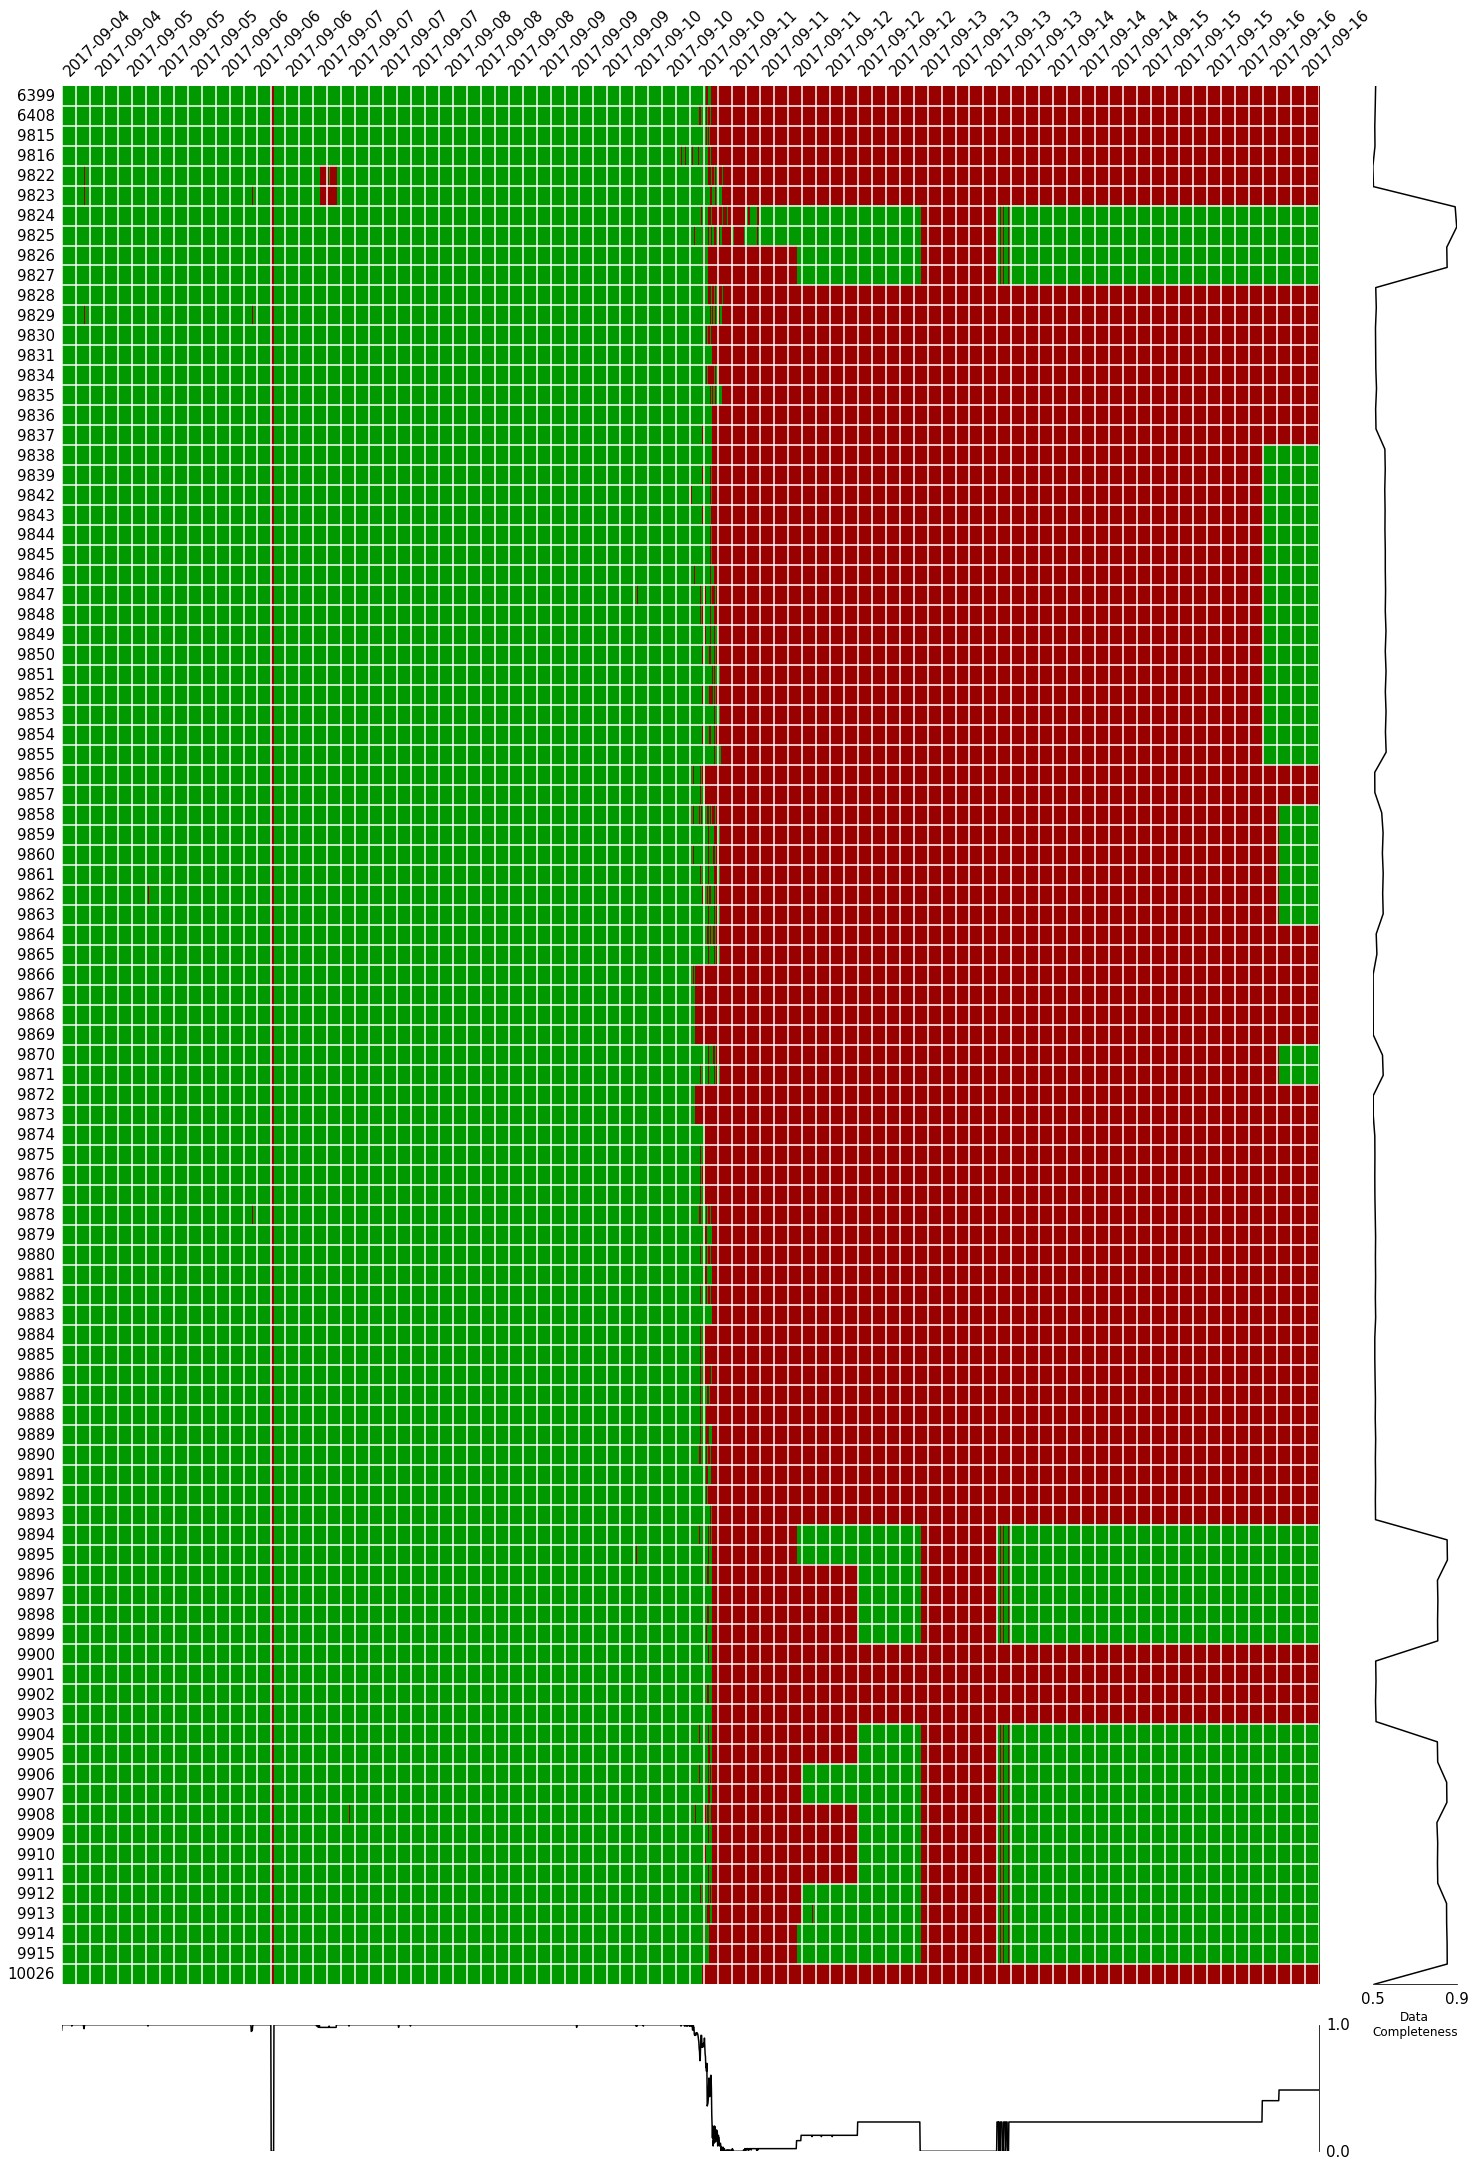

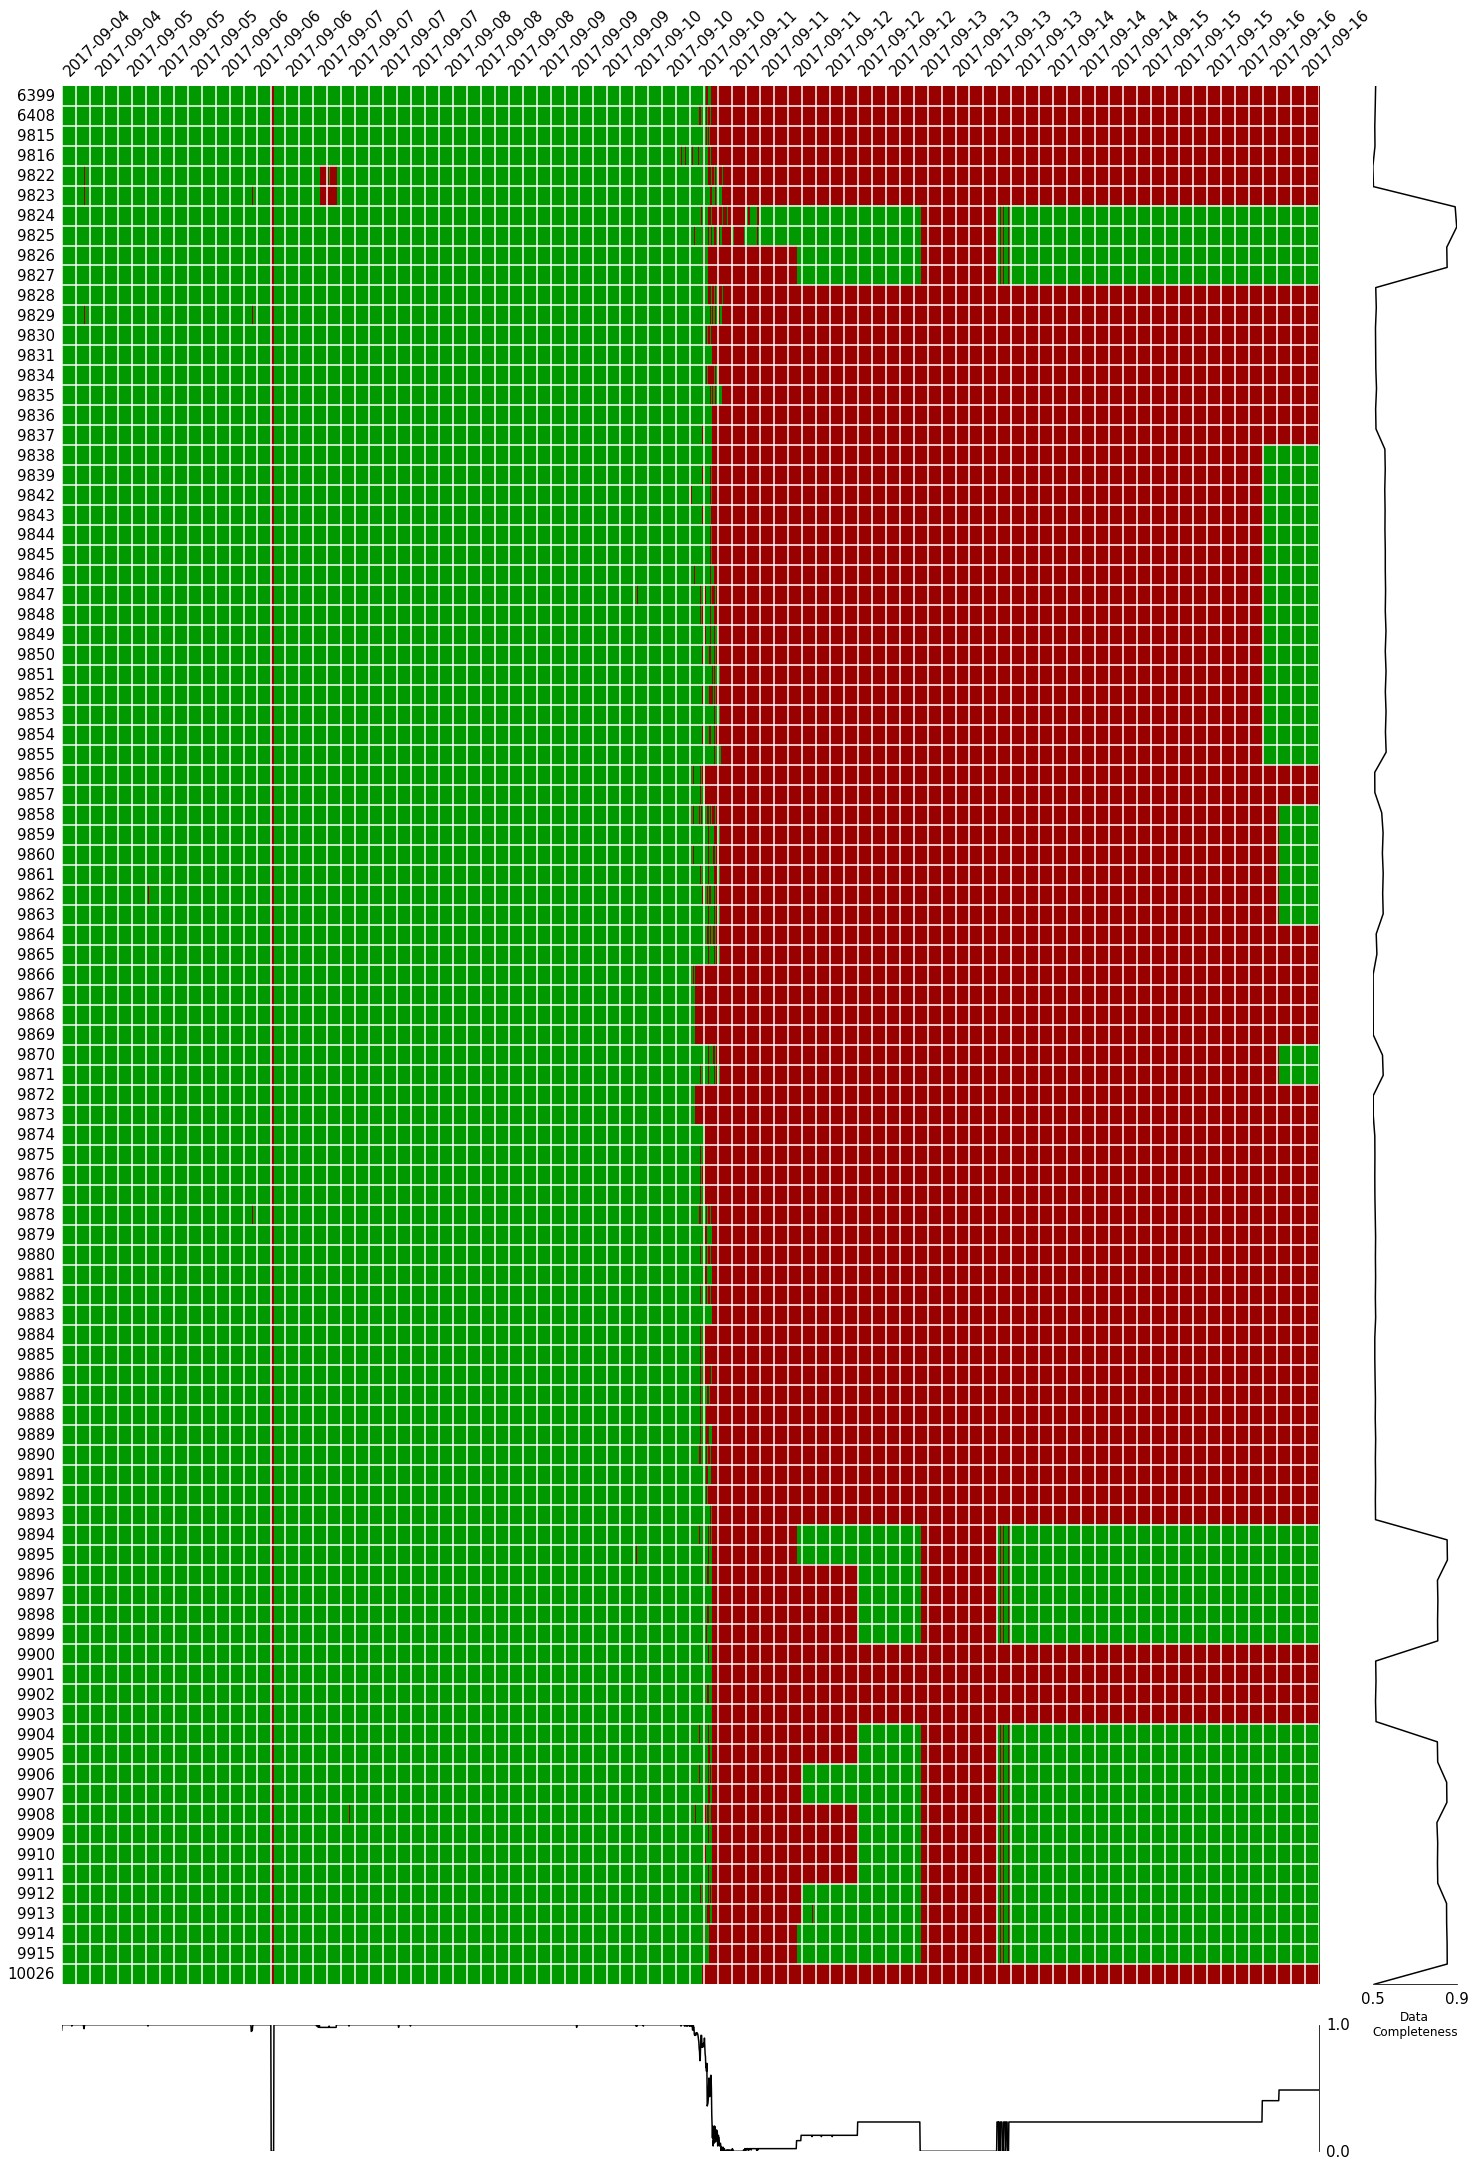

Sorting notna-count by percentage


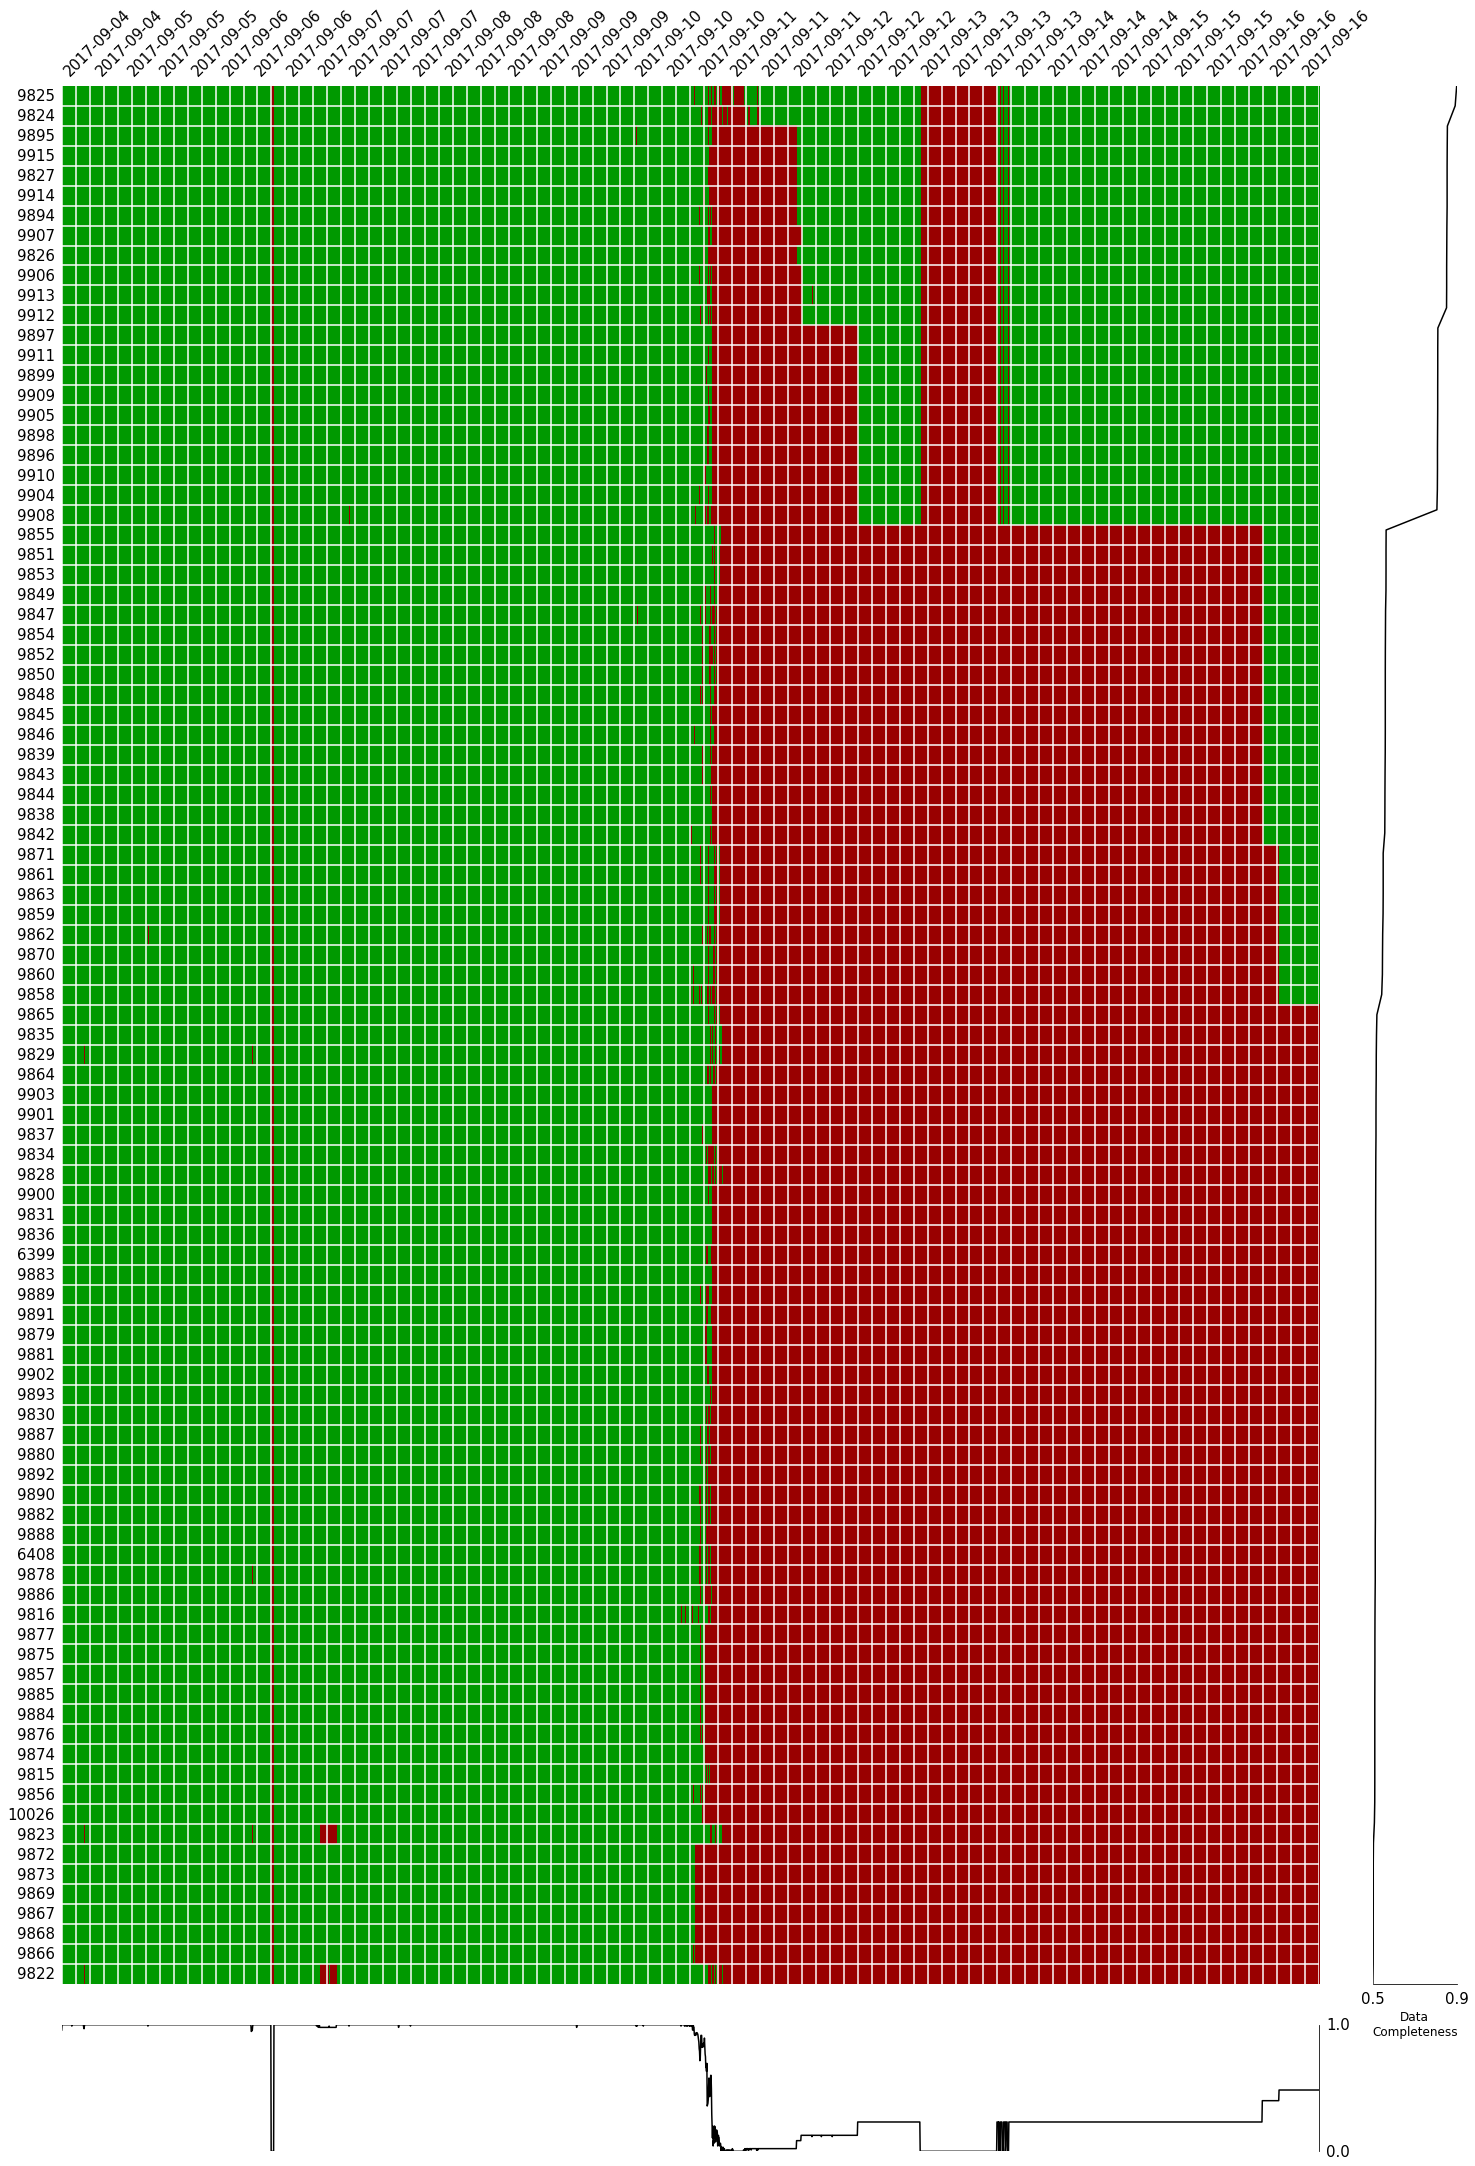

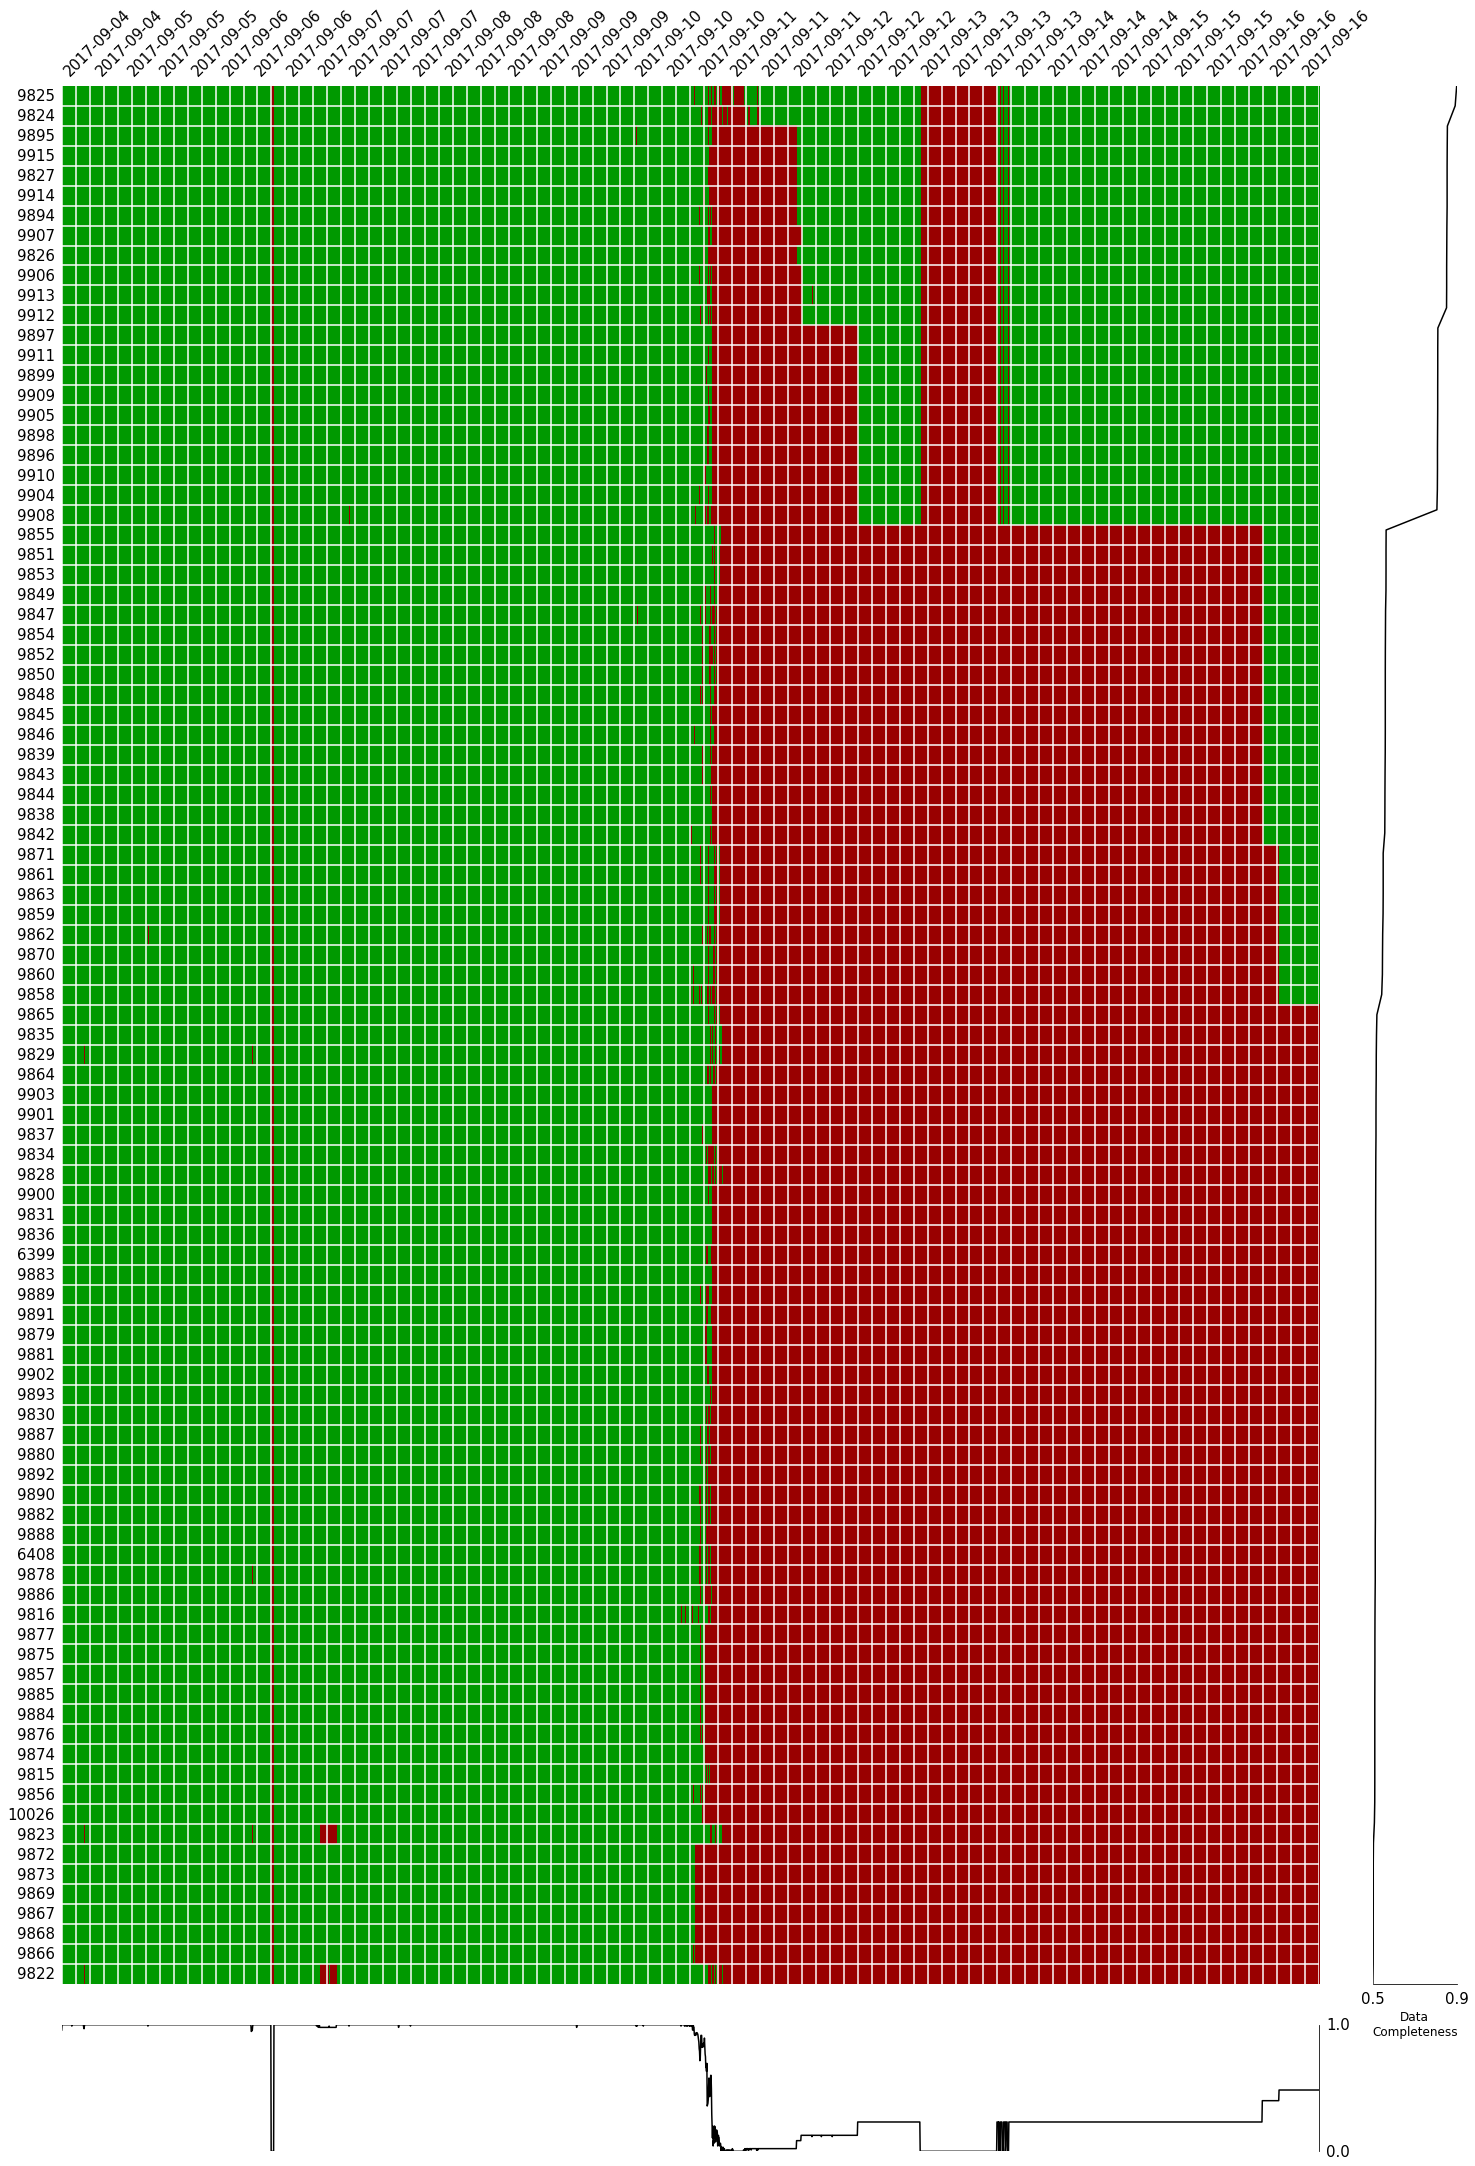

In [13]:
values = [SPD,VOL] # test multi-series-multi-var
df = ritis.dt_gap_fill(ritis.pivot(zone,values))
ritis.nullity_analysis(df)

In [ ]:
# test multi-series-single-var
values=[SPD]
df = ritis.dt_gap_fill(ritis.pivot(zone,values))    
ritis.nullity_analysis(df)

In [ ]:
# test single-series-single-var
values=[SPD]
df = ritis.dt_gap_fill(ritis.pivot(zone.loc[zone.id=='9825',:],values)) 
ritis.nullity_analysis(df)

In [14]:
values=[SPD,VOL]
df = ritis.dt_gap_fill(ritis.pivot(zone.loc[zone.id.isin(['9825','9826']),:],values)) 
ipd(df.head())

Inferred Frequency by counting gaps : 0 days 00:05:00
Filling the gaps in dates
Current frequency from index : <5 * Minutes>


var                      speed            volume       
id                        9825       9826   9825   9826
dt                                                     
2017-09-04 11:45:00  72.969121  70.826132  120.0  200.0
2017-09-04 11:50:00  70.406681  58.629418  159.0  216.0
2017-09-04 11:55:00  73.030404  48.664875  142.0  119.0
2017-09-04 12:00:00  69.060569  51.524760  146.0  274.0
2017-09-04 12:05:00  71.982814  66.217126  147.0  318.0

In [22]:
for var in df.columns.levels[0]:
    print(df.head().loc[:,var].copy().melt(value_name=var))
print(df.melt(value_name='val',ignore_index=False).head())
print(df.melt(value_name='val',ignore_index=False).pivot_table(index=['id','dt'],columns='var',values='val').reset_index(level=0).head())

     id      speed
0  9825  72.969121
1  9825  70.406681
2  9825  73.030404
3  9825  69.060569
4  9825  71.982814
5  9826  70.826132
6  9826  58.629418
7  9826  48.664875
8  9826  51.524760
9  9826  66.217126
     id  volume
0  9825   120.0
1  9825   159.0
2  9825   142.0
3  9825   146.0
4  9825   147.0
5  9826   200.0
6  9826   216.0
7  9826   119.0
8  9826   274.0
9  9826   318.0
                       var    id        val
dt                                         
2017-09-04 11:45:00  speed  9825  72.969121
2017-09-04 11:50:00  speed  9825  70.406681
2017-09-04 11:55:00  speed  9825  73.030404
2017-09-04 12:00:00  speed  9825  69.060569
2017-09-04 12:05:00  speed  9825  71.982814
var                    id      speed  volume
dt                                          
2017-09-04 11:45:00  9825  72.969121   120.0
2017-09-04 11:50:00  9825  70.406681   159.0
2017-09-04 11:55:00  9825  73.030404   142.0
2017-09-04 12:00:00  9825  69.060569   146.0
2017-09-04 12:05:00  9825  71.982814 

In [ ]:
# visualize NA/Null Timeseries data

# First replace all na values to 1 : s.isnull().astype(int)
# now loop through it ... collecting start and end points
#   at every start and end point collected create this object:
#   ax.axvspan(nan_idx-0.25, nan_idx+0.25, facecolor='white', alpha=0.5, hatch='X')


In [ ]:
keys = df1.columns

ncols = 1
nrows = math.ceil(len(keys) / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16,6*nrows))
axes = axes.flatten()
plt.xticks(rotation=45)

for ax, key in zip(range(len(keys)),keys):
    ax = axes[ax]
    dates = df1.index.to_list()
    ax.plot_date(dates, df1[key].values, '-b*',markersize=2, markeredgewidth=0, color='b' )
    ax.set_title(key)
    ax.set_xlabel('datetime')
    ax.set_ylabel(key[0])
    #s = the_dict[key]
    #nans = s.isnull().astype(int).cumsum()
    #print(nans)
    #nan_idx = df[df.isna()].index #np.where(the_dict[key].isnull())[0] #np.where(df['b'].notnull())[0]
    #for nan_i in nan_idx:
        #ax.axvline(nan_i,color='g', alpha=0.5)
    #plt.axvspan(nan_idx-0.25, nan_idx+0.25, facecolor='white', alpha=0.5, hatch='X')
    break
plt.show()

In [ ]:
for nullity analysis:
    
    # TODO can be done in notebook


    return df, gap_count, notna_count

# TODO: This is not generic code, take it somewhere else

